In [43]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:

archivo=pd.read_json("globos_de_oro.zip")
df=pd.DataFrame(archivo)
df=df[["anho","categoria","nominacion","titulo","subtitulo"]]


In [45]:
categorias_pelicula = [
    'Best Motion Picture - Drama',
    'Best Motion Picture - Musical or Comedy',
    'Best Motion Picture - Animated',
    'Best Motion Picture - Foreign Language',
]
categorias_persona = [
    'Best Performance by an Actress in a Motion Picture - Drama',
    'Best Performance by an Actor in a Motion Picture - Drama',
    'Best Performance by an Actress in a Motion Picture - Musical or Comedy',
    'Best Performance by an Actor in a Motion Picture - Musical or Comedy',
    'Best Performance by an Actress in a Supporting Role in any Motion Picture',
    'Best Performance by an Actor in a Supporting Role in any Motion Picture',
    'Best Director - Motion Picture',
    'Best Screenplay - Motion Picture',
    'Best Original Score - Motion Picture',
    'Best Original Song - Motion Picture',
    'Best Performance by an Actress in a Limited Series or a Motion Picture Made for Television',
    'Best Performance by an Actor in a Limited Series or a Motion Picture Made for Television',
]

In [71]:
def total_nominaciones(lista_nombres):
    dict={}
    for nombre in lista_nombres:
        win_count=0
        loss_count=0
        df_aux=df.loc[(df.titulo == nombre)]
        df_sub=df_aux.loc[(df_aux.categoria.isin(categorias_persona)) | (df_aux.categoria.isin(categorias_pelicula))]
        for Winner in range (df_aux[df.nominacion == "Winner"].shape[0]):
            win_count+=1
        for Nominee in range (df_aux[df.nominacion == "Nominee"].shape[0]):
            loss_count+=1
        dict[nombre]={
            "victorias": win_count,
            "derrotas": loss_count
            }
    return dict
dict=total_nominaciones(["Tom Hanks","Meg Ryan","Brad Pitt"])
dict

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


{'Tom Hanks': {'victorias': 4, 'derrotas': 5},
 'Meg Ryan': {'victorias': 0, 'derrotas': 3},
 'Brad Pitt': {'victorias': 1, 'derrotas': 4}}

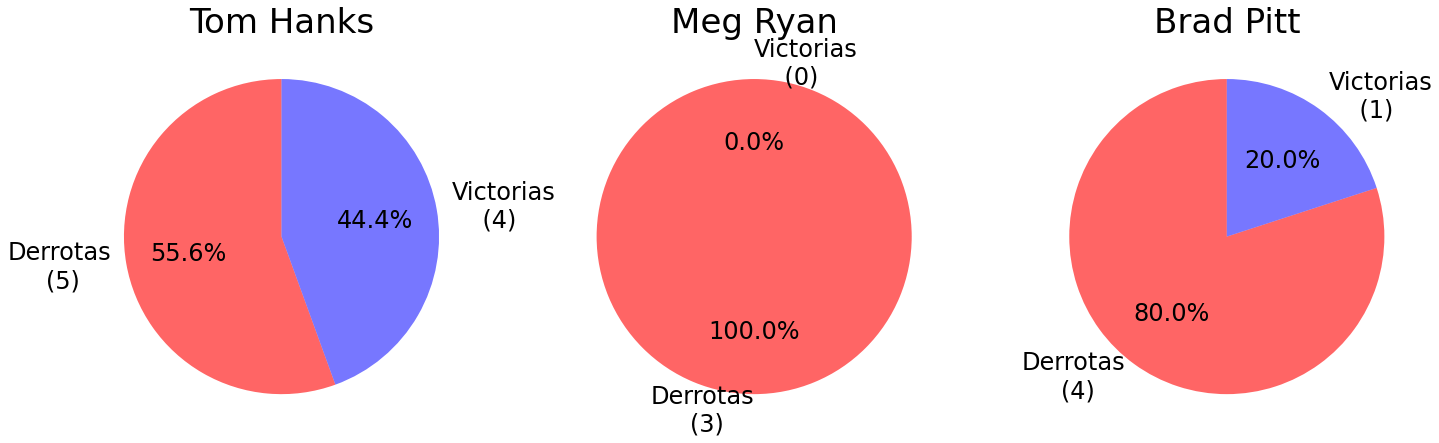

In [12]:
#graficos en barra y torta del ejercicio 1
alpha = 1.00
opciones = {
    'autopct': '%1.1f%%',
    'shadow': False, 
    'startangle': 90,
    'textprops': {'size': 24},
    'colors': ['#FF000099', '#0000FF88'], 
}
cantidad_nombres=len(dict)

plt.figure(figsize=(cantidad_nombres*8, 8))
for contador, nombre in enumerate(dict, start=1):
    
    victorias= dict[nombre]["victorias"]
    derrotas= dict[nombre]["derrotas"]
    x_labels = [
    'Derrotas\n({})    '.format(derrotas),
    'Victorias\n    ({})'.format(victorias),
    ]
    y = [
        derrotas,
        victorias,
        ]
    plt.subplot(1, cantidad_nombres, contador)
    plt.pie(y, labels=x_labels, **opciones)
    plt.title(nombre, fontsize= 34)

In [87]:
def cantidades_nom():
    menor_año=df.anho.min()
    mayor_año=df.anho.max()
    Dict={}
    for anho in range(menor_año, mayor_año+1):
        Dict[anho]=[]
        df_anho=df.loc[(df.anho == anho)]
        df_aux=df_anho.loc[(df_anho.categoria.isin(categorias_pelicula)) | (df_anho.categoria.isin(categorias_persona))]
        nombres=[]
        for i in range(df_aux.shape[0]):
            peli=df_aux.subtitulo[df_aux.index[i]]
            
            if peli == "":
                peli= df_aux.titulo[df_aux.index[i]]
            
            if peli not in nombres:
                nombres.append(peli)
            
        for nombre in nombres:
            nominaciones=0
            df_aux=df_aux.loc[(df_aux.subtitulo == nombre)]
            for j in range(df_aux.shape[0]):
                    nominaciones+=1
                        
            if (nominaciones > 1):
                Dict[anho].append({
                    "nombre":nombre,
                    "cantidad":nominaciones,
                })
                    
    cantidades=[]
    nombres=[]
        
    for anho in sorted(Dict):
        for item in Dict[anho]:
            cantidades.append(item["cantidad"])
            nombres.append("{} | {}".format(anho, item["nombre"]))
                
        
    return {
        "cantidades":cantidades,
        "nombres":nombres,
    }

d=cantidades_nom()

In [88]:
d["nombres"][:10]

['1944 | For Whom The Bell Tolls',
 "1947 | The Razor's Edge",
 "1948 | Gentleman's Agreement",
 "1950 | All The King's Men",
 '1951 | Sunset Boulevard',
 '1952 | A Place In The Sun',
 '1955 | On the Waterfront',
 '1957 | Around the World in 80 Days',
 '1958 | Bridge on the River Kwai, The',
 '1959 | Defiant Ones, The']

In [95]:
df_first=df.loc[(df.categoria.isin(categorias_persona)) | df.categoria.isin(categorias_pelicula)]
df_aux=df_first.loc[(df_first.subtitulo == "Going My Way") | (df_first.titulo == "Going My Way")]
nombres=[]
Dict=[]
D
for i in range(df_aux.shape[0]):
    peli=df_aux.subtitulo[df_aux.index[i]]
            
    if peli == "":
        peli= df_aux.titulo[df_aux.index[i]]
            
    if peli not in nombres:
        nombres.append(peli)
for nombre in nombres:
        nominaciones=0
        df_aux=df_aux.loc[(df_aux.subtitulo == nombre)]
        for j in range(df_aux.shape[0]):
            nominaciones+=1
if (nominaciones > 1):
                Dict[anho].append({
                    "nombre":nombre,
                    "cantidad":nominaciones,
                })
                    
cantidades=[]
nombres=[]
        
for anho in sorted(Dict):
    for item in Dict[anho]:
        cantidades.append(item["cantidad"])
        nombres.append("{} | {}".format(anho, item["nombre"]))

IndexError: list index out of range

In [89]:

df_anho=df.loc[(df.anho == 1945)]
df_aux=df_anho.loc[(df_anho.categoria.isin(categorias_pelicula)) | (df_anho.categoria.isin(categorias_persona))]
df_aux

,anho,categoria,nominacion,titulo,subtitulo
6,1945,Best Performance by an Actress in a Supporting...,Winner,Agnes Moorehead,Mrs. Parkington
7,1945,Best Performance by an Actor in a Supporting R...,Winner,Barry Fitzgerald,Going My Way
8,1945,Best Director - Motion Picture,Winner,Leo McCarey,Going My Way


In [ ]:
def cantidades_nom_pelis(año):
    categorias_pelicula=["Best Motion Picture - Drama", "Best Motion Picture - Musical or Comedy", "Best Motion Picture - Animated"]
    categorias_personas=["Best Performance by an Actress in a Motion Picture - Drama",
                    "Best performance by an Actor in a Motion Picture - Drama",
                    "Best performance by an Actress in a Motion Picture - Musical or Comedy",
                    "Best performance by an Actor in a Motion Picture - Musical or Comedy",
                    "Best performance by an Actress in a Supporting Role in any Motion Picture",
                    "Best performance by an Actor in a Supporting Role in any Motion Picture",
                    "Best Director - Motion Picture",
                    "Best Screenplay - Motion Picture",
                    "Best Motion Picture - Foreign Language",
                    "Best Original Score - Motion Picture",
                    "Best Performance by an Actress in a Limited Series or a Motion Picture Made for Television",
                    "Best Performance by an Actor in a Limited Series or a Motion Picture Made for Television"]
    df_aux=df.loc[df.anho == año]
    dict={}
    pelis_repetidas=[]
    for nominacion in range(df_aux.shape[0]):
        nomi_count=0
        if df_aux.categoria[df_aux.index[nominacion]] in categorias_pelicula or categorias_personas:
            pelicula=df_aux.subtitulo[df_aux.index[nominacion]]
            if pelicula != "":
                for i in range(df_aux.shape[0]):
                    if pelicula not in pelis_repetidas:
                        if df_aux.subtitulo[df_aux.index[i]] == pelicula or df_aux.titulo[df_aux.index[i]] == pelicula:
                            nomi_count+=1
                    if nomi_count > 1:
                        dict[pelicula]={"cantidad de nominaciones": nomi_count}
                pelis_repetidas.append(pelicula)
    return dict

cantidades_nom_pelis(1976)

In [7]:
#Graficos para el ejercicio 2

In [4]:
def racha(actores):
    Dict={}
    categorias_pelicula=["Best Motion Picture - Drama", "Best Motion Picture - Musical or Comedy", "Best Motion Picture - Animated"]
    categorias_personas=["Best Performance by an Actress in a Motion Picture - Drama",
                    "Best Performance by an Actor in a Motion Picture - Drama",
                    "Best Performance by an Actress in a Motion Picture - Musical or Comedy",
                    "Best Performance by an Actor in a Motion Picture - Musical or Comedy",
                    "Best Performance by an Actress in a Supporting Role in any Motion Picture",
                    "Best Performance by an Actor in a Supporting Role in any Motion Picture",
                    "Best Director - Motion Picture",
                    "Best Screenplay - Motion Picture",
                    "Best Motion Picture - Foreign Language",
                    "Best Original Score - Motion Picture",
                    "Best Performance by an Actress in a Limited Series or a Motion Picture Made for Television",
                    "Best Performance by an Actor in a Limited Series or a Motion Picture Made for Television"]
    for i in range(len(actores)):
        df_test=df.loc[df.titulo == actores[i]]
        df_aux=df_test.loc[(df.categoria.isin(categorias_pelicula)) | (df.categoria.isin(categorias_personas))]
        nominee_count=0
        win_count=0
        
        for nominate in range(df_aux.shape[0]):
            actor=df_aux.titulo[df_aux.index[i]]
            nominacion=df_aux.index[nominate]
    
            if df_aux.nominacion[nominacion] == "Nominee":
                nominee_count+=1
    
            if df_aux.nominacion[nominacion] == "Winner":
                win_count+=1
        if nominee_count > 0 and win_count == 0:
                dict[actor]={"siempre ha perdido, derrotas":nominee_count}
                    
        if win_count > 0 and nominee_count == 0:
                Dict[actor]={"Siempre ha ganado, victorias":win_count}
                
        elif nominee_count != 0 and win_count != 0:
            Dict[actor]={"racha inestable, total nominaciones":win_count + nominee_count}
            
    return Dict

racha(["Brad Pitt","Paul Newman","Tom Cruise"])

{'Brad Pitt': {'racha inestable, total nominaciones': 5},
 'Paul Newman': {'racha inestable, total nominaciones': 10},
 'Tom Cruise': {'racha inestable, total nominaciones': 7}}

In [ ]:
#Graficos ejercicio 3

In [13]:
def racha_perfecta(dataframe):
    Dict={}
    categorias_pelicula=["Best Motion Picture - Drama", "Best Motion Picture - Musical or Comedy", "Best Motion Picture - Animated"]
    categorias_personas=["Best Performance by an Actress in a Motion Picture - Drama",
                    "Best Performance by an Actor in a Motion Picture - Drama",
                    "Best Performance by an Actress in a Motion Picture - Musical or Comedy",
                    "Best Performance by an Actor in a Motion Picture - Musical or Comedy",
                    "Best Performance by an Actress in a Supporting Role in any Motion Picture",
                    "Best Performance by an Actor in a Supporting Role in any Motion Picture",
                    "Best Director - Motion Picture",
                    "Best Screenplay - Motion Picture",
                    "Best Motion Picture - Foreign Language",
                    "Best Original Score - Motion Picture",
                    "Best Performance by an Actress in a Limited Series or a Motion Picture Made for Television",
                    "Best Performance by an Actor in a Limited Series or a Motion Picture Made for Television"]
    
    df_aux=dataframe.loc[(dataframe.categoria.isin(categorias_pelicula)) & (dataframe.subtitulo == "")]
    
    for pelicula in range(df_aux.shape[0]):
        Pelicula=df_aux.titulo[df_aux.index[pelicula]]
        df_def=df_aux.loc[df_aux.titulo == Pelicula]
        logros=[]
        win_count=0
        for nomination in range(df_def.shape[0]):
            if df_aux.nominacion[df_def.index[nomination]] == "Winner":
                win_count+=1
                if df_def.categoria[df_def.index[nomination]] not in logros:
                    logros.append(df_def.categoria[df_aux.index[nomination]])
        if len(logros) == 4:
            Dict[Pelicula]={"Ha ganado en todas las categorias, victorias totales":win_count}
    return Dict
racha_perfecta(df)

KeyError: 3

In [26]:
categorias_pelicula=["Best Motion Picture - Drama", "Best Motion Picture - Musical or Comedy", "Best Motion Picture - Animated"]
df_aux=df.loc[(df.categoria.isin(categorias_pelicula)) & (df.subtitulo == "")]
dict={}
for i in range(df_aux.shape[0]):
    Pelicula=df_aux.titulo[df_aux.index[i]]
    count=0
    for j in range(df_aux.shape[0]):
        if df_aux.titulo[df_aux.index[j]] == Pelicula:
            count+=1
    if count > 1:
        dict[pelicula]=count

dict

{}

In [54]:
def victorias(dataframe):
    Dict={}
    categorias_pelicula=["Best Motion Picture - Drama", "Best Motion Picture - Musical or Comedy", "Best Motion Picture - Animated"]
    categorias_personas=["Best Performance by an Actress in a Motion Picture - Drama",
                    "Best Performance by an Actor in a Motion Picture - Drama",
                    "Best Performance by an Actress in a Motion Picture - Musical or Comedy",
                    "Best Performance by an Actor in a Motion Picture - Musical or Comedy",
                    "Best Performance by an Actress in a Supporting Role in any Motion Picture",
                    "Best Performance by an Actor in a Supporting Role in any Motion Picture",
                    "Best Director - Motion Picture",
                    "Best Screenplay - Motion Picture",
                    "Best Motion Picture - Foreign Language",
                    "Best Original Score - Motion Picture",
                    "Best Performance by an Actress in a Limited Series or a Motion Picture Made for Television",
                    "Best Performance by an Actor in a Limited Series or a Motion Picture Made for Television"]

    df_aux=dataframe.loc[(dataframe.categoria.isin(categorias_pelicula)) | (dataframe.categoria.isin(categorias_personas))]
    actores=[]
    for i in range(df_aux.shape[0]):
        if df_aux.titulo[df_aux.index[i]] not in actores and df_aux.subtitulo[df_aux.index[i]] != "":
            actor=df_aux.titulo[df_aux.index[i]]
            actores.append(actor)
        
    for actor in actores:
        win_count=0
        df_actor=df_aux.loc[df_aux.titulo == actor]
        for i in range(df_actor.shape[0]):
            if df_actor.nominacion[df_actor.index[i]] == "Winner":
                win_count+=1

            if win_count >= 1:
                Dict[actor]={"Ha ganado mas de una vez, victorias":win_count}
    return Dict
victorias(df)

{'Katina Paxinou': {'Ha ganado mas de una vez, victorias': 1},
 'Akim Tamiroff': {'Ha ganado mas de una vez, victorias': 1},
 'Henry King': {'Ha ganado mas de una vez, victorias': 1},
 'Agnes Moorehead': {'Ha ganado mas de una vez, victorias': 2},
 'Barry Fitzgerald': {'Ha ganado mas de una vez, victorias': 1},
 'Leo McCarey': {'Ha ganado mas de una vez, victorias': 1},
 'Angela Lansbury': {'Ha ganado mas de una vez, victorias': 2},
 'J. Carroll Naish': {'Ha ganado mas de una vez, victorias': 1},
 'Billy Wilder': {'Ha ganado mas de una vez, victorias': 2},
 'Anne Baxter': {'Ha ganado mas de una vez, victorias': 1},
 'Clifton Webb': {'Ha ganado mas de una vez, victorias': 1},
 'Frank Capra': {'Ha ganado mas de una vez, victorias': 1},
 'Celeste Holm': {'Ha ganado mas de una vez, victorias': 1},
 'Edmund Gwenn': {'Ha ganado mas de una vez, victorias': 2},
 'Elia Kazan': {'Ha ganado mas de una vez, victorias': 4},
 'George Seaton': {'Ha ganado mas de una vez, victorias': 1},
 'Max Steiner

In [14]:
actores=["Tom Cruise","Bradd Pit"]
for actor in actores:
    print(actor)

Tom Cruise
Bradd Pit


In [53]:
test=df.loc[df.titulo == "The White Ribbon (Das Weisse Band - Eine Deutsche Kindergeschichte)"]
nombre=""
for i in range(test.shape[0]):
    nombre=test.subtitulo[test.index[i]]
lista=nombre.split(",")
lista[1]

' Michael Haneke'

In [41]:
test.subtitulo

6656    Germany, Michael Haneke
Name: subtitulo, dtype: object